# Objetivo

Neste notebook, consideramos que os vídeos da aula 2, que aborda a definição de conceitos de probabilidade, foram assistidos. Neste notebook, façamos uma breve reflexão da natureza das probabilidades e vejamos três exemplos muito interessantes sobre resultados não intuitivos, mas que provém simplesmente de operações simples da teoria das probabilidades.

## Afinal, o que é probabilidade?

A teoria das probabilidades começou a ser desenvolvida formalmente no século XVI por matemáticos interessados em entender padrões em jogos de azar. Um desses matemáticos foi Girolamo Cardano, cuja obra não publicada "O livro dos jogos de azar" deu um pontapé inicial ao tratamento metódico da modelagem da incerteza.

A probabilidade é real ou inventada por nós, seres humanos?

<!-- Certamente, a probabilidade é uma invenção! -->

Tome o seguinte problema:

Um modelo matemático recente utiliza diversas informações sobre a atmosfera terrestre e o histórico dos últimos dias para determinar se etá chovendo em qualquer lugar do mundo neste momento. Ao executar uma chamada a este modelo para prever se está chovendo no Vaticano neste exato momento, o modelo retorna que existe uma probabilidade de 90% de que esteja chovendo.

Para nós, usuários do modelo, existe uma probabilidade de 90% de que esteja chovendo no Vaticano. E quanto ao papa? Para ele ou está chovendo (probabilidade de 100%) ou não está! (probabilidade de 0%). Em toda aplicação prática, se conhecemos a realidade, então não existe o conceito de probabilidade no mundo real. Esse conceito apenas nos caracteriza uma incerteza que temos sobre o mundo. Ou seja, a probabilidade é uma forma de medir a nossa incerteza sobre os fenômenos do mundo.

### E quanto a uma moeda? Existe uma probabilidade conhecida de cair cara!

Em uma moeda, usualmente atribuímos uma probabilidade 0.5 ao evento "cara". Embora associamos uma incerteza ao experimento de jogar uma moeda, se eu conheço exatamente a força sendo aplicada sobre a moeda, sua massa, e a posição da moeda em que cada força é aplicada, seria possível predizer com exatidão o seu estado antes de mesmo de lançá-la.

### Para a ciência

De fato, seguindo uma mentalidade puramente Newtoniana, poderíamos dizer que está tudo determinado. Supondo a existência do famoso Demônio de Laplace, que conhece a posição e estado de todas as partículas do universo, então o universo é apenas uma cadeia de eventos, ocorrendo de formas previsíveis e não existe o livre arbítrio. Poderíamos argumentar que o nosso destino já está traçado desde o momento que o universo foi criado e somos apenas escravos da nossa própria existência.

### E quanto à mecânica quântica?

A mecânica quântica é, possivelmente, o único indício de que possa existir uma aleatoriedade inerente ao universo. Uma partícula que se encontra em estado de sobreposição é dita estar em "todos os estados possíveis simultaneamente" até que seja propriamente medida, quando ela é "forçada" a assumir apenas um estado. A probabilidade associada à partícula é oriunda de uma função de onda. Uma das interpretações aceitas dentro da mecânica quântica (Interpretação de Copenhaga) rejeita a hipótese de que existam variáveis determinísticas ocultas, as quais poderíam tornar o estado das particulas determinístico.

Embora tenhamos essa possibilidade de uma "aleatoriedade" inerente no universo, ainda assim, as probabilidades representam a nossa interpretação matemática dessa aleatoriedade. O valor associado a uma probabilidade sempre será fruto da criação humana.

# Exemplos

### O Jogo de Monty Hall

No programa "Let's make a deal", apresentado por Monty Hall entre 1963 e 1976 e relançado diversas vezes entre 1980 e 1991, havia um jogo simples, ainda assim nada intuitivo. O jogo seguia da seguinte forma:

O participante recebe a opção de escolher uma dentre três portas. Atrás de uma delas há um carro e atrás das demais existem cabras. Uma vez feita a escolha, o apresentador do programa, que sabe o que tem atrás de cada porta, abre uma das duas portas que não foram escolhidas, revelando uma cabra. Em seguida, ele dá ao participante a oportunidade de trocar de porta.

O participante deve trocar de porta ou não?

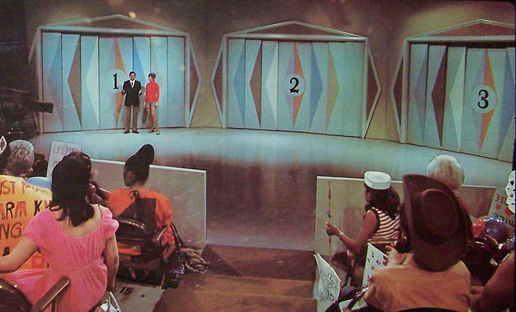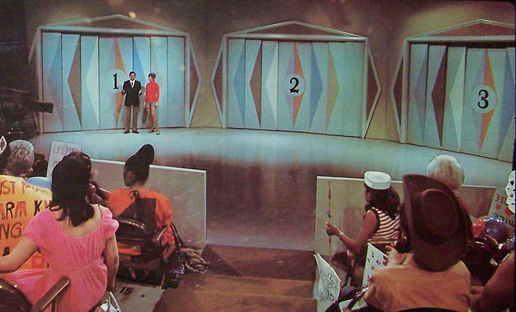

Essa pergunta foi tão polêmica nos Estados Unidos, que envolveu milhares de PhDs enraivecidos com a resposta da escritora Marilyn vos Savant em sua coluna do jornal "Ask Marilyn", da revista Parade. A escritora havia afirmado que era mais vantajoso trocar de porta, recebendo inúmeras mensagens que apontavam essa afirmação como uma grande gafe.

<!-- Afinal, havendo duas portas restantes, a probabilidade de que a segunda contenha o carro deve ser 50\%, não? -->

Como, a princípio, a probabilidade de que o carro esteja em cada porta é igual a 1/3, vamos supor que o participante sempre escolhe a porta 1, já que a ordem inicial é irrelevante. Consideramos agora os eventos.

* A: O carro está atrás da porta 1
* B: O apresentador abre a porta 2

Agora, se a porta 1 realmente contém o carro, então as portas 2 e 3 contém cabras. O apresentador escolhe qualquer uma das duas com probabilidade 1/2. Agora, se o carro não está em A, existe a probabilidade de 50% que esteja na porta 2 e de 50% que esteja na porta 3, sendo assim, o apresentador ainda abre a porta 2 com probabilidade 1/2.

\begin{equation*}
    P(B | A) = 1/2 \ \ \ \ \text{ e } \ \ \ \ P(B | A^c) = 1/2
\end{equation*}

Pelo Teorema da Probabilidade Total, temos que

\begin{align*}
    P(B) &= P(A \cap B) + P(A^c \cap B)\\
    &= P(B | A)P(A) + P(B | A^c) P(A^c)\\
    &= \frac{1}{2} \cdot \frac{1}{3} + \frac{1}{2} \cdot \frac{2}{3}\\
    &= \frac{1}{2}
\end{align*}

Agora, qual a probabilidade de que o carro esteja em A, sabendo que o apresentador abriu a porta 2?

\begin{equation*}
    P(A | B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B | A) P(A)}{P(B)} = \dfrac{1/2 \cdot 1/3}{1/2} = \frac{1}{3}
\end{equation*}

Ou seja, a probabilidade de que o participante ganhe o carro, se manter a sua escolha na porta 1 continua sendo 1/3. Afinal, sua escolha foi feita antes de que fosse revelado o conteúdo da porta 2. Sendo assim, se o participante trocar para a terceira porta, tem uma probabilidade de 2/3 dela conter o carro.

In [1]:
import numpy as np

In [2]:
def play_monty_hall(porta_escolhida):
    print("Você escolheu a porta {}".format(porta_escolhida))
    # A porta com o prêmio é selecionada aleatóriamente
    porta_com_premio = np.random.randint(3)+1

    possibilidades = []
    for n in [1,2,3]:
        # Se o número da porta não tem o prêmio e não foi escolhida, a adiciona como uma possibilidade a ser aberta
        if(n != porta_com_premio and n != porta_escolhida):
            possibilidades.append(n)
    
    # Das portas disponíveis, escolhe uma para ser aberta
    porta_aberta = np.random.choice(possibilidades, size = 1)

    r = input("O apresentador abriu a porta {}. Trocar de porta? (s/n)".format(porta_aberta[0]))

    if(r == "s"):
        # Percorre as possibilidades e seleciona aquela que não foi escolhida e não foi aberta
        for n in [1,2,3]:
            if(n != porta_escolhida and n != porta_aberta):
                porta_escolhida = n
                break
        print("Porta trocada para {}".format(porta_escolhida))
    print("A porta com o prêmio era a {}.".format(porta_com_premio))
    if(porta_com_premio == porta_escolhida):
        print("Você ganhou!")
    else:
        print("Você perdeu!")

In [3]:
play_monty_hall(1)

Você escolheu a porta 1


O apresentador abriu a porta 2. Trocar de porta? (s/n) s


Porta trocada para 3
A porta com o prêmio era a 1.
Você perdeu!


In [4]:
play_monty_hall(3)

Você escolheu a porta 3


O apresentador abriu a porta 2. Trocar de porta? (s/n) n


A porta com o prêmio era a 3.
Você ganhou!


In [5]:
play_monty_hall(2)

Você escolheu a porta 2


O apresentador abriu a porta 1. Trocar de porta? (s/n) s


Porta trocada para 3
A porta com o prêmio era a 2.
Você perdeu!


In [6]:
def play_monty_hall_automatic(porta_escolhida, trocar):
    # A porta com o prêmio é selecionada aleatóriamente
    porta_com_premio = np.random.randint(3)+1

    possibilidades = []
    for n in [1,2,3]:
        # Se o número da porta não tem o prêmio e não foi escolhida, a adiciona como uma possibilidade a ser aberta
        if(n != porta_com_premio and n != porta_escolhida):
            possibilidades.append(n)
    
    # Das portas disponíveis, escolhe uma para ser aberta
    porta_aberta = np.random.choice(possibilidades, size = 1)
    
    if(trocar):
        # Percorre as possibilidades e seleciona aquela que não foi escolhida e não foi aberta
        for n in [1,2,3]:
            if(n != porta_escolhida and n != porta_aberta):
                porta_escolhida = n
    if(porta_com_premio == porta_escolhida):
        return 1
    else:
        return 0

In [7]:
n_jogadas = 10000

jogos = []
for i in range(n_jogadas):
    resultado = play_monty_hall_automatic(1, True)
    jogos.append(resultado)
print("Resultados dos 20 primeiros jogos: {}".format(jogos[:20]))
print("Proporção de vitórias: {}".format(np.mean(jogos)))

Resultados dos 20 primeiros jogos: [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
Proporção de vitórias: 0.6645


### Aniversariantes no mesmo dia

Dado um grupo de $N$ pessoas, qual a probabilidade de que ao menos duas delas façam aniversário em um mesmo dia?

Embora a resposta dessa pergunta pareça ser um valor baixo, dado que temos 365 dias no ano, surpreendentemente, é um valor consideravelmente alto. Façamos o cálculo, obtendo qual a probabilidade de que, em um grupo de $N$ pessoas, não existam indivíduos com a mesma data de aniversário. Supondo que todos os dias do ano são igualmente prováveis de acontecer, contemos o número de situações em que isso pode ocorrer:

* Selecione a primeira pessoa.
* A 2ª pessoa faz aniversário em um dia diferente da primeira: 364 possibilidades.
* A 3ª pessoa faz  aniversário em um dia diferente das duas primeiras: 363 possibilidades.
* ...
* A Nºa pessoa faz aniversário em um dia diferente das N-1 primeiras: 365 - (N-1) possibilidades.

Assim, a probabilidade de que em um grupo de $N < 365$ pessoas, não existam empates de aniversários será dada por

\begin{equation*}
    P(\text{Sem empates}) = \frac{365}{365} \cdot \frac{364}{365} \cdot \frac{363}{365} \cdots \frac{365 - (N-1)}{365}
\end{equation*}

Podemos escrever essa probabilidade como 

\begin{equation*}
    P(\text{Sem empates}) = \frac{365!}{(365 - N)!} \cdot \frac{1}{365^N}
\end{equation*}

Sendo assim, a probabilidade de que exista ao menos um empate de aniversários será dada por

\begin{equation*}
    P(\text{Ao menos um empate}) = 1 - P(\text{Sem empates}) = 1 - \frac{365!}{(365 - N)!} \cdot \frac{1}{365^N}
\end{equation*}

Para um grupo de $N = 10$ pessoas, essa probabilidade de ao menos um empate é igual a 0.1169. Para $N=30$ essa probabilidade já é em torno de 0.7063!

In [8]:
def prob_empate_aniversario(N):
    prod = 1
    for i in range(N):
        prod *= (365-i)
    return 1 - prod / 365**N

In [9]:
prob_empate_aniversario(26)

0.598240820135939

### O paradoxo de São Petesburgo

Este problema envolve o cálculo da esperança matemática do ganho em um jogo de azar. Mais detalhes são dados no exercício 7 da Lista 1.